<h1> 501 Data Pipeline Workshop 9/24 </h1>
<h3> Part 1: Data Exploration</h3>

In [16]:
## Imports- these are the python packages used in part 1 of the workshop
# Pandas- for manipulating spreadsheet data
import pandas as pd
# Numpy for calculations
import numpy as np
# Folium for geographic mapping
import folium
# Matplotlib for drawing plots
import matplotlib.pyplot as plt

<p>The data we will be using is from U of I's <i>The Cybernetics Thought Collective (Digital Surrogates)</i> </p>
<p>It is downloaded as CTC_Machine-Generated-Data.csv from the project's website.</p>

In [17]:
## Import the data from file
cybernetics_data = pd.read_csv ('CTC_Machine-Generated-Data.csv')

# Display the first three rows of the data as a spreadsheet
display(cybernetics_data.head(3))

,Master Filename,Level of Description,Title,Date,Scope and Contents,Creator,Associated Person (Machine Generated),Subject,Location,Format of Material,Language,Cybernetic Classification (Machine Generated),Classification Certainty (Machine Generated),Machine-extracted Feature (Machine Generated),Overall Sentiment (Machine Generated),Percent Positive Sentiment (Machine Generated),Percent Negative Sentiment (Machine Generated),Percent Neutral Sentiment (Machine Generated),Rights,Parent Collection,Repository,Collection Identifier
0,1106834_2_LogicoPhilosophicalCommentsSelfOrg_1...,File,TR No. 5: Some Logico: Philosophical Comments ...,1960,Biological Computer Laboratory Publications in...,"Mullin, A. A.",Wittgenstein||Wiener||Turing||Pask||McCulloch|...,self-organizing systems,Urbana (IL),Publication,eng,Personal,"Personal, 100.00%||Math, 0.00%||Psychology, 0....",Wittgenstein||Wiener||Turing||Pask||McCulloch|...,0.9975,7.0,2.6,90.4,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834
1,1106834_2_PresentTheorySwitching_1960.pdf,File,TR No. 3: The Present Theory of Switching and ...,1960,Biological Computer Laboratory Publications in...,"Mullin, A. A.",Wiener||Shannon||Pitts||McCulloch,switching circuits,Urbana (IL),Publication,eng,Personal,"Personal, 100.00%||Math, 0.00%||Psychology, 0....",Wiener||Shannon||Pitts||McCulloch||Biological|...,0.9948,6.8,5.0,88.3,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834
2,1106834_2_LinearPropertyFilters_1962.pdf,File,"TR No. 1 and 2: Linear Property Filters, Alfre...",1962,Biological Computer Laboratory Publications in...,"von Foerster, Heinz||Inselberg, Alfred",Pitts||McCulloch||Maturana||Lettvin,linear systems,Urbana (IL),Publication,eng,Personal,"Personal, 99.96%||Math, 0.04%||Psychology, 0.0...",Pitts||McCulloch||Maturana||Lettvin||Biologica...,0.9992,8.3,3.8,87.9,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834


<h3>Before we start exploring the data we have on the documents, let's look at where the documents come from by making a geographic map.</h3>
<p> The spreadsheet contains a "Location" column with the name of a city, we can use these two free map data csvs:
<br>
https://simplemaps.com/data/world-cities<br>
and https://simplemaps.com/data/us-cities<br>
to get latitude and longitude data for most of the cities in the dataset.
</p>

In [36]:
##make a map
#import the city location data csvs
world_cities = pd.read_csv ("worldcities.csv")
us_cities = pd.read_csv ("uscities.csv")

##make columns in the location dataframes that match the format of the placenames in the cybernetics_data dataframe
world_cities['name_id'] = world_cities['city'] + ' (' + world_cities['country']+')'
us_cities['name_id'] = us_cities['city'] + ' (' + us_cities['state_id']+')'

In [38]:
##make a new dataframe with: 
#location names from cybernetics_data, 
#count of occurences of that place in the data,
# and lat and long for that location

##make a list of places by separating entries with multiple locations
place_list = []
for i in cybernetics_data['Location']:
    if not pd.isna(i):
        place_list.append(i.split('||'))

place_list = [item for sublist in place_list for item in sublist]

#make a dataframe out of that list of places
latlong_df = pd.Series(place_list).value_counts().reset_index()
latlong_df.columns = ['name_id', 'count']

#bring in the lat and long values from our reference dataframes
world_selected = world_cities[['name_id','lat', 'lng']]
us_selected = us_cities[['name_id','lat', 'lng']]
cities_df = pd.concat([world_selected, us_selected])

latlong_df = pd.merge(latlong_df, cities_df, on='name_id', how='left') 

#manually set the lat and long for Washington, D.C. which is a common location but formatted differently
latlong_df.loc[latlong_df['name_id'] == 'Washington (D.C.)', 'lat'] = 38.9047
latlong_df.loc[latlong_df['name_id'] == 'Washington (D.C.)', 'lng'] = -77.0163

display(latlong_df)

,name_id,count,lat,lng
0,Urbana (IL),268,40.1107,-88.1973
1,New York (NY),21,40.6943,-73.9249
2,Champaign (IL),21,40.1142,-88.2737
3,Washington (D.C.),16,38.9047,-77.0163
4,Chicago (IL),16,41.8375,-87.6866
...,...,...,...,...
195,Hartford (CT),1,41.7661,-72.6834
196,Dunmow (England),1,NaN,NaN
197,Babylon (NY),1,NaN,NaN
198,Brussels (Belgium),1,50.8467,4.3525


In [39]:
##plot on a map

#remove nans
map_df = latlong_df.dropna()

#instantiate the map object, and set a starting location for the display
m = folium.Map(location=[30, -50], zoom_start=2)

#add place markers, with transparency so that darker marks represent many overlapping items
for lat, lon in zip(map_df['lat'], map_df['lng']):
    folium.CircleMarker([lat, lon],
                       radius=4,
                        color='r',
                        fill=True,
                        weight=0,
                        fill_opacity=0.2
                       ).add_to(m)
display(m)

<h3>Now let's dig into the columns and variables we have in the data</h3>
<h1>From the archive's readme file</h1>
<p>
* **Master Filename** = Name of the digital object, which is a digitized multi-page bound item or folder of correspondence stored as a PDF. This is human-generated data.

* **Level of Description** = Level of archival description of the digital object. All digital objects were described at the file-level. This is human-generated data.
          
* **Title** = Title of the digital object with which the data are associated. This is a human-readable title that corresponds to the filename for either a folder-level aggregation of correspondence or the title of a bound publication or journal (e.g., "Mead, Margaret, 1968-71, 1974" or "Von Foerster, Heinz, "On Constructing a Reality," BCL Publication 234"). This is human-generated data.
               
* **Date** = Date(s) or date range(s) of the archival materials. This is human-generated data.

* **Scope and Contents** = Collection-level description of the fonds (or personal papers or record series) digitized for this project. This is human-generated data.

* **Creator** = Agent(s) who created the archival materials (this is not always the same as the creator or owner of the personal papers or records). This is human-generated data.

* **Associated Person** = Individuals who are subjects within the archival materials. This is machine-generated data.

* **Subject** = Subject headings related to the contents of the archival materials. This is human-generated data.

* **Location** = Geographical locations associated with the archival materials. This is human-generated data.

* **Format of Material** = Type or genre of the materials represented by the digital object, such as correspondence or publication. This is human-generated data.

* **Language** = Language(s) of the archival materials. This is human-generated data.

* **Cybernetic Classification** = Category into which the digital object has been classified. There are four classifications: Mathematics/Logic; Computers/Machines; Psychology/Neuroscience; and Personal. This is machine-generated data.

* **Classification Certainty** = Degree of certainty with which the digital object has been classified (expressed as a percentage). This is machine-generated data.

* **Machine-extracted Feature** = Cybernetics entities extracted based on initial inputs found in Cybernetics-Terms_inputs.csv. This is machine-generated data.

* **Overall Sentiment** = Compound score for sentiment analysis for the digital object. This is machine-generated data.

* **Percent Positive Sentiment** = Score representing proportion of content that is positive. This is machine-generated data.

* **Percent Negative Sentiment** = Score representing proportion of content that is negative. This is machine-generated data.

* **Percent Neutral Sentiment** = Score representing proportion of content that is neutral. This is machine-generated data.

* **Rights** = Copyright terms for the archival materials. This is human-generated data.

* **Parent Collection** = Original personal papers or record series to which the archival materials belong. This is human-generated data.

* **Repository** = Parent institution which owns the archival materials. This is human-generated data.

* **Collection Identifier** = Unique identifier assigned to the personal papers or records series by its parent institution. This is human-generated data.
</p>

In [19]:
## we can also list each column, type of data, and number of unique entries as they are stored in the pandas dataframe

#for each column header in the data spreadsheet,
for i in cybernetics_data.columns:
    #print the column title
    print (i)
    #print the pandas data type that that column is stored as
    print ('Data type: '+ str(cybernetics_data[i].dtype))
    #print the number of different values in that column, and a new line for formatting 
    print ('Number of Unique entries: '+ str(cybernetics_data[i].nunique()), '\n')

Master Filename
Data type: object
Number of Unique entries: 629 

Level of Description
Data type: object
Number of Unique entries: 1 

Title
Data type: object
Number of Unique entries: 620 

Date
Data type: object
Number of Unique entries: 237 

Scope and Contents
Data type: object
Number of Unique entries: 5 

Creator
Data type: object
Number of Unique entries: 532 

Associated Person (Machine Generated)
Data type: object
Number of Unique entries: 191 

Subject
Data type: object
Number of Unique entries: 314 

Location
Data type: object
Number of Unique entries: 230 

Format of Material
Data type: object
Number of Unique entries: 3 

Language
Data type: object
Number of Unique entries: 13 

Cybernetic Classification (Machine Generated)
Data type: object
Number of Unique entries: 4 

Classification Certainty (Machine Generated)
Data type: object
Number of Unique entries: 242 

Machine-extracted Feature (Machine Generated)
Data type: object
Number of Unique entries: 382 

Overall Sentim

<h3>Next, let's see how many of the documents in the collection are attributed to each of the main four contributing scientists</h3>

In [18]:
##The document have multiple creators in a list, each name is split by "||" so we need to separate them to count

#make an empty list to store all the creators
creator_list = []

#iterate through the dataframe column and split up the names
for i in cybernetics_data['Creator']:
    if not pd.isna(i):
        creator_list.append(i.split('||'))

#turn the list of lists into one list
creator_list = [item for sublist in creator_list for item in sublist]

#make a frequency table of how often each name occurs in the list
frequency_table = {}
for item in creator_list:
    frequency_table[item] = frequency_table.get(item, 0) + 1

#sort by number of occurences
sorted_items_desc = sorted(frequency_table.items(), key=lambda item: item[1], reverse=True)

#print the name and number for the 4 most frequent creators
for i in sorted_items_desc[:4]:
    print (i)

('von Foerster, Heinz', 288)
('McCulloch, Warren S.', 128)
('Wiener, Norbert', 88)
('Ashby, W. Ross (William Ross)', 36)


<h3>To start looking at how the system works, we can make a simple line plot showing how variables change over time</h3>
<p>To do this, we first need to add a new column that standardizes the dates</p>
<p>Then we can choose a y variable from any of the numeric columns:
               
    Overall Sentiment (Machine Generated)
               
    Percent Positive Sentiment (Machine Generated)
               
    Percent Negative Sentiment (Machine Generated)
               
    Percent Neutral Sentiment (Machine Generated)
</p>

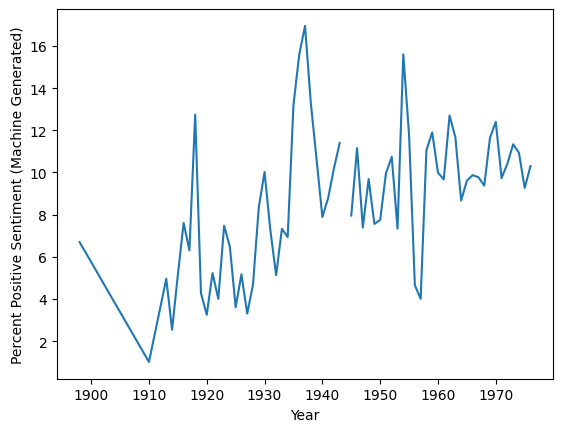

In [27]:
##plot the relationship between two variables
# x variable will be time
# we can choose a y-variable from any of the numeric columns:
y_var = 'Percent Positive Sentiment (Machine Generated)'

#clean up the dates column, by taking the first year in the entry
cybernetics_data['year'] = cybernetics_data['Date'].str.split('-|\|\|').str.get(0)
cybernetics_data['year'] = cybernetics_data['year'].str.replace(r'[^0-9]', '', regex=True)

# Group by year and calculate the mean of your chosen variable for that year
average_by_year = cybernetics_data.groupby('year')[y_var].mean().reset_index()

x = pd.to_numeric(average_by_year['year'])
y = average_by_year[y_var]
plt.plot(x, y)

# Add labels and a title
plt.xlabel("Year")
plt.ylabel(y_var)

# Display the plot
plt.show()

<h3> We can also explore these variables across the different scientists.</h3>

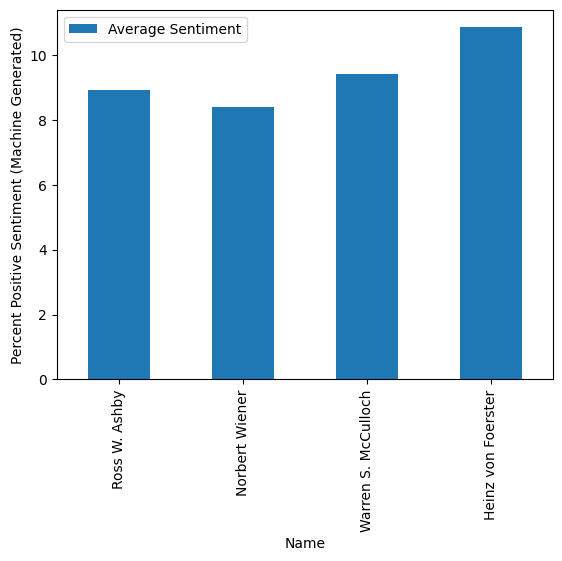

In [29]:
## plot by creator
ashby_df = cybernetics_data[cybernetics_data['Creator'].str.contains('Ashby, W. Ross', na=False)]
wiener_df = cybernetics_data[cybernetics_data['Creator'].str.contains('Wiener, Norbert', na=False)]
mcculloch_df = cybernetics_data[cybernetics_data['Creator'].str.contains('McCulloch, Warren S.', na=False)]
vonfoerster_df = cybernetics_data[cybernetics_data['Creator'].str.contains('von Foerster, Heinz', na=False)]

data = {
    'Name': ['Ross W. Ashby', 'Norbert Wiener', 'Warren S. McCulloch', 'Heinz von Foerster'],
    'Average Sentiment': [ashby_df[y_var].mean(), 
                          wiener_df[y_var].mean(), 
                          mcculloch_df[y_var].mean(),  
                          vonfoerster_df[y_var].mean()]
                          }

#make 
creator_df = pd.DataFrame(data)
creator_df.plot.bar(x='Name', y='Average Sentiment')
plt.ylabel(y_var)

plt.show()

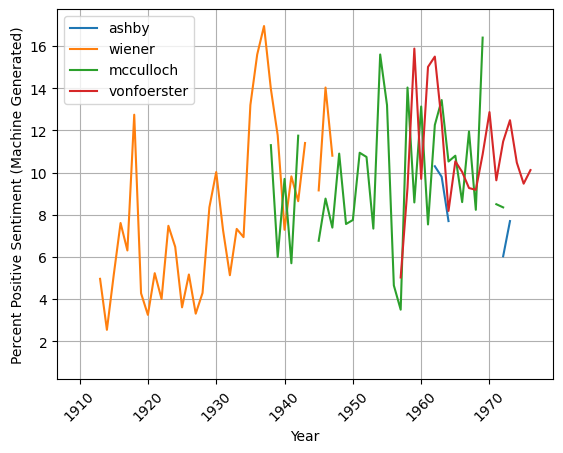

In [72]:
## creator by year

ashby_avg = ashby_df.groupby('year')[y_var].mean().reset_index()
wiener_avg = wiener_df.groupby('year')[y_var].mean().reset_index()
mcculloch_avg = mcculloch_df.groupby('year')[y_var].mean().reset_index()
vonfoerster_avg = vonfoerster_df.groupby('year')[y_var].mean().reset_index()

##make a new dataframe

data = {'year': range(1910,1985)}
new_plot_df = pd.DataFrame(data)
new_plot_df['year'] = new_plot_df['year'].astype(str)
new_plot_df = pd.merge(new_plot_df, ashby_avg, on='year', how='left')
new_plot_df = new_plot_df.rename(columns={y_var: 'ashby'})

new_plot_df = pd.merge(new_plot_df, wiener_avg, on='year', how='left')
new_plot_df = new_plot_df.rename(columns={y_var: 'wiener'})

new_plot_df = pd.merge(new_plot_df, mcculloch_avg, on='year', how='left')
new_plot_df = new_plot_df.rename(columns={y_var: 'mcculloch'})

new_plot_df = pd.merge(new_plot_df, vonfoerster_avg, on='year', how='left')
new_plot_df = new_plot_df.rename(columns={y_var: 'vonfoerster'})


# Plot col1, col2, and col3 against the index
new_plot_df.plot(x = 'year', y=['ashby', 'wiener', 'mcculloch', 'vonfoerster'], kind='line')

plt.xticks(rotation=45)

plt.xlabel('Year')
plt.ylabel(y_var)
plt.legend()
plt.grid(True)
plt.show()

<h3>For a last exploration of the data, let's look at the text, via some of the extracted entities provided. How often does a given term pop up in these papers and correspondences over time?</h3>
<p>First we'll make a list of the features you can look at, and then plot over time like we've been doing.</p>

In [73]:
##make a list of all the machine extracted 'features' in the document texts
#these are in the column 'Machine-extracted Feature (Machine Generated)'

#make an empty list
features_list = []

#iterate through the dataframe column and split up the entries
for i in cybernetics_data['Machine-extracted Feature (Machine Generated)']:
    if not pd.isna(i):
        features_list.append(i.split('||'))

#turn the list of lists into one list
features_list = [item for sublist in features_list for item in sublist]

#make a frequency table of how often each name occurs in the list
frequency_table = {}
for item in features_list:
    frequency_table[item] = frequency_table.get(item, 0) + 1

#sort by number of occurences
sorted_items_desc = sorted(frequency_table.items(), key=lambda item: item[1], reverse=True)

display(sorted_items_desc)

[('Ear', 351),
 ('Art', 342),
 ('Man', 322),
 ('Time', 315),
 ('Cat', 314),
 ('System', 264),
 ('Sun', 255),
 ('State', 254),
 ('Laboratory', 250),
 ('Science', 238),
 ('Hand', 233),
 ('Information', 230),
 ('Engineering', 227),
 ('Order', 224),
 ('Allo', 222),
 ('Action', 217),
 ('Eye', 215),
 ('Theory', 209),
 ('Systems', 208),
 ('Hear', 205),
 ('Function', 199),
 ('Mind', 198),
 ('Program', 197),
 ('Computer', 194),
 ('Process', 194),
 ('effect', 194),
 ('Vision', 191),
 ('Experiment', 187),
 ('Biological', 184),
 ('Structure', 184),
 ('Technology', 183),
 ('Future', 180),
 ('Model', 180),
 ('Cause', 180),
 ('Value', 179),
 ('Nature', 179),
 ('Design', 178),
 ('Control', 178),
 ('Law', 176),
 ('Knowledge', 176),
 ('Human', 175),
 ('Brain', 174),
 ('Purpose', 172),
 ('Open', 171),
 ('Concept', 171),
 ('Society', 168),
 ('Machine', 165),
 ('American', 165),
 ('Communication', 163),
 ('Physics', 163),
 ('Scientific', 163),
 ('Space', 161),
 ('McCulloch', 160),
 ('World', 159),
 ('Map',

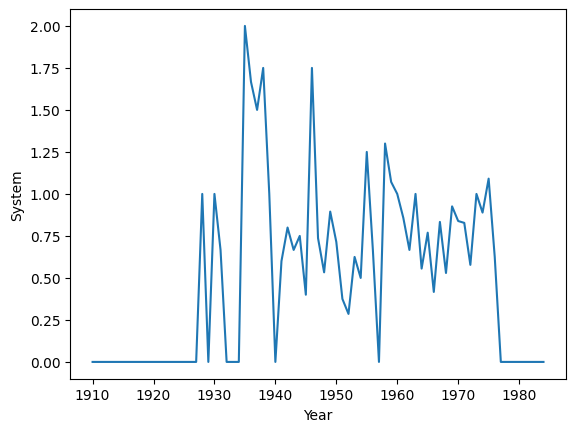

In [79]:
##
term = 'System'

#for every year, count number of times that term is in the string
years = string_list = [str(x) for x in range(1910,1985)]
term_freq = []
for year in years:
    year_subset = cybernetics_data[cybernetics_data['year'] == year]
    if len(year_subset)>0:
        count = year_subset['Machine-extracted Feature (Machine Generated)'].str.count(term).sum()
        #normalize by number of documents for that year. comment out the line below if you just want total mentions
        count = count/len (year_subset)
    else:
        count = 0
    term_freq.append(count)

x = pd.to_numeric(years)
y = term_freq
plt.plot(x, y)

# Add labels and a title
plt.xlabel("Year")
plt.ylabel(term)

# Display the plot
plt.show()


<h3>Feel free to try this with other variables or explore more parts of the data! In part 2 we will set up a network and predict the flow of information across the "thought collective"</h3>